In [723]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
import matplotlib.pyplot as plt

In [724]:
stroke_data= pd.read_csv("healthcare-dataset-stroke-data.csv")
df= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [725]:
df.shape

(5110, 12)

In [726]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [727]:
df.values

array([[9046, 'Male', 67.0, ..., 36.6, 'formerly smoked', 1],
       [51676, 'Female', 61.0, ..., nan, 'never smoked', 1],
       [31112, 'Male', 80.0, ..., 32.5, 'never smoked', 1],
       ...,
       [19723, 'Female', 35.0, ..., 30.6, 'never smoked', 0],
       [37544, 'Male', 51.0, ..., 25.6, 'formerly smoked', 0],
       [44679, 'Female', 44.0, ..., 26.2, 'Unknown', 0]], dtype=object)

In [728]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [729]:
df.dropna
df= df.dropna()
df.to_csv('clean_healthcare-dataset-stroke-data.csv', index=False)
#dropped rows with missing values, and save edited df as a new csv

In [730]:
clean_stroke_data= pd.read_csv("clean_healthcare-dataset-stroke-data.csv")
cdf= pd.read_csv("clean_healthcare-dataset-stroke-data.csv")

In [731]:
#Understanding the data and putting it into context

In [732]:
cdf.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


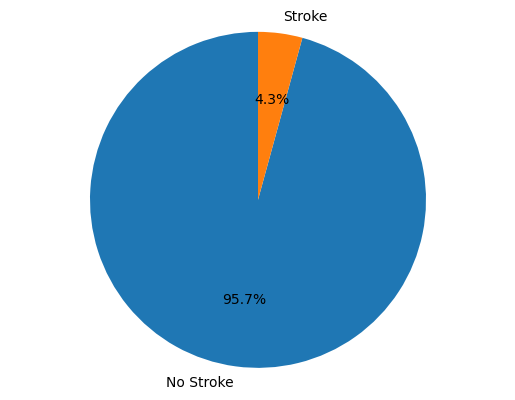

In [733]:
#Percentage of individuals with strokes in dataset
stroke_counts = cdf['stroke'].value_counts()

plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

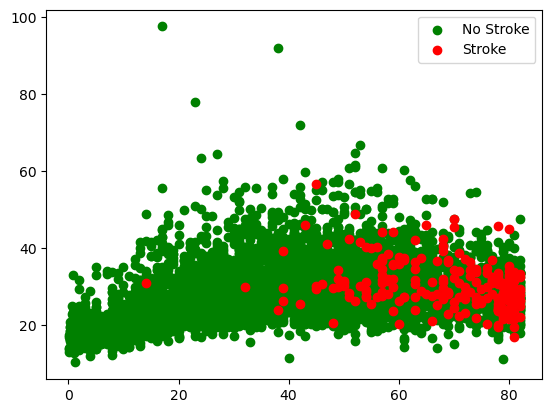

In [734]:
#Correlation between age, bmi, and strokes

plt.scatter(cdf[cdf['stroke'] == 0]['age'], cdf[cdf['stroke'] == 0]['bmi'], color='green', label='No Stroke')
plt.scatter(cdf[cdf['stroke'] == 1]['age'], cdf[cdf['stroke'] == 1]['bmi'], color='red', label='Stroke')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_title('Correlation between Age, BMI, and Strokes')
plt.legend()
plt.show()

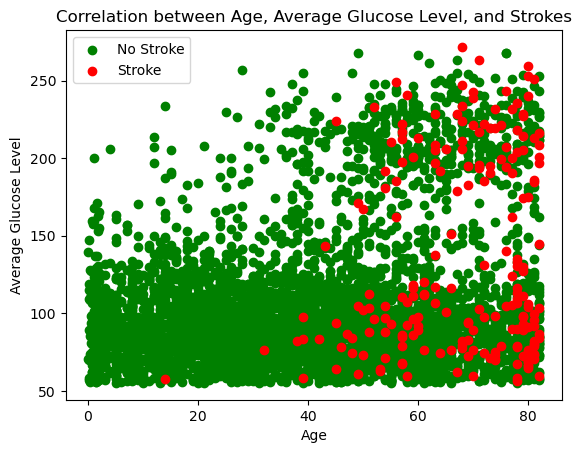

In [735]:
#Correlation between Age, Average Glucose Level, and Strokes

fig, ax = plt.subplots()

ax.scatter(cdf[cdf['stroke'] == 0]['age'], cdf[cdf['stroke'] == 0]['avg_glucose_level'], color='green', label='No Stroke')
ax.scatter(cdf[cdf['stroke'] == 1]['age'], cdf[cdf['stroke'] == 1]['avg_glucose_level'], color='red', label='Stroke')

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_title('Correlation between Age, Average Glucose Level, and Strokes')
ax.legend()

plt.show()

In [736]:
#Residence Type and Strokes

#Group the data by "Residence_type" and "stroke", and count the occurrences
grouped_data = cdf.groupby(['Residence_type', 'stroke']).size().unstack()

#Calculate the number of strokes and no strokes
num_strokes = grouped_data[1].sum()
num_no_strokes = grouped_data[0].sum()

#Calculate the percentage of strokes and no strokes
total_cases = num_strokes + num_no_strokes
percentage_strokes = (num_strokes / total_cases) * 100
percentage_no_strokes = (num_no_strokes / total_cases) * 100

print("Number of Strokes by Residence Type:")
print(grouped_data[1])
print("\nNumber of No Strokes by Residence Type:")
print(grouped_data[0])
print("\nTotal Number of Strokes:", num_strokes)
print("Total Number of No Strokes:", num_no_strokes)

#Calculate the percentage of strokes for each residence type
grouped_data['Percentage of Strokes'] = (grouped_data[1] / grouped_data.sum(axis=1)) * 100

print("Percentage of Strokes by Residence Type:")
print(grouped_data['Percentage of Strokes'])

Number of Strokes by Residence Type:
Residence_type
Rural    100
Urban    109
Name: 1, dtype: int64

Number of No Strokes by Residence Type:
Residence_type
Rural    2319
Urban    2381
Name: 0, dtype: int64

Total Number of Strokes: 209
Total Number of No Strokes: 4700
Percentage of Strokes by Residence Type:
Residence_type
Rural    4.13394
Urban    4.37751
Name: Percentage of Strokes, dtype: float64


In [737]:
#Training model to predict strokes

In [738]:
#Created an input (X) and output (y)
X= clean_stroke_data.drop(columns=["stroke"])
y= clean_stroke_data["stroke"]

In [739]:
#Drop "id" column from dataset 
cdf= cdf.drop(columns=["id"])
cdf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [740]:
cdf
#Need to convert Category responses to numerical/float values for machine learning algorithm to process

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4904,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [741]:
cdf.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [742]:
cdf["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [743]:
#Assign numerical values to "gender" column and replace it in data
cleanup_gender= {"gender": {"Male": 0, "Female":1, "Other":2}}
cdf= cdf.replace(cleanup_gender)
cdf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [744]:
cdf["ever_married"].value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [745]:
#Assign numerical values to "ever_married" column and replace it in data
cleanup_ever_married= {"ever_married": {"No": 0, "Yes":1}}
cdf= cdf.replace(cleanup_ever_married)
cdf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [746]:
cdf["work_type"].value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [747]:
#Assign numerical values to "work_type" column and replace it in data
cleanup_work_type= {"work_type":{"children":1, "Govt_job":2, "Private":3, "Self-employed":4, "Never_worked":5}}
cdf= cdf.replace(cleanup_work_type)
cdf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,3,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,3,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,4,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,3,Urban,186.21,29.0,formerly smoked,1


In [748]:
cdf["Residence_type"].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [749]:
#Assign numerical values to "Residence_type" column and replace it in data
cleanup_Residence_type= {"Residence_type": {"Urban":0, "Rural":1}}
cdf= cdf.replace(cleanup_Residence_type)
cdf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,0,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,3,1,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,3,0,171.23,34.4,smokes,1
3,1,79.0,1,0,1,4,1,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,3,0,186.21,29.0,formerly smoked,1


In [750]:
cdf["smoking_status"].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [751]:
#Assign numerical values to "smoking_status" column and replace it in data
cleanup_smoking_status= {"smoking_status":{"never smoked":1, "formerly smoked":2, "smokes":3, "Unknown":4}}
cdf= cdf.replace(cleanup_smoking_status)
cdf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,0,228.69,36.6,2,1
1,0,80.0,0,1,1,3,1,105.92,32.5,1,1
2,1,49.0,0,0,1,3,0,171.23,34.4,3,1
3,1,79.0,1,0,1,4,1,174.12,24.0,1,1
4,0,81.0,0,0,1,3,0,186.21,29.0,2,1


In [752]:
#Create independent("X") and dependent("y") variable datasets for machine learning
X= cdf.drop(columns=["stroke"])
y= cdf["stroke"]


model= DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [753]:
#test predictions of manually inputed values
test_predictions= model.predict([[0, 67, 1, 1, 1, 2, 0, 230, 35, 4], [1, 38, 1, 1, 1, 2, 0, 220, 33, 4]])
test_predictions

/Users/ChrisFamilusi/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0])

In [754]:
#Split input and output datasets for training and for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
predictions= model.predict(X_test)


score= accuracy_score(y_test, predictions)
score

0.9215885947046843

In [755]:
#Saving this trained model to a file    
clean_stroke_data= pd.read_csv("clean_healthcare-dataset-stroke-data.csv")
cdf= pd.read_csv("clean_healthcare-dataset-stroke-data.csv")

joblib.dump(model, "stroke-predicter.joblib")

['stroke-predicter.joblib']

In [756]:
#Testing trained model that was saved     
model= joblib.load("stroke-predicter.joblib")
model_predictions= model.predict([[0, 67, 1, 1, 1, 2, 0, 230, 35, 4], [1, 38, 1, 1, 1, 2, 0, 220, 33, 4]])
model_predictions

/Users/ChrisFamilusi/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0])

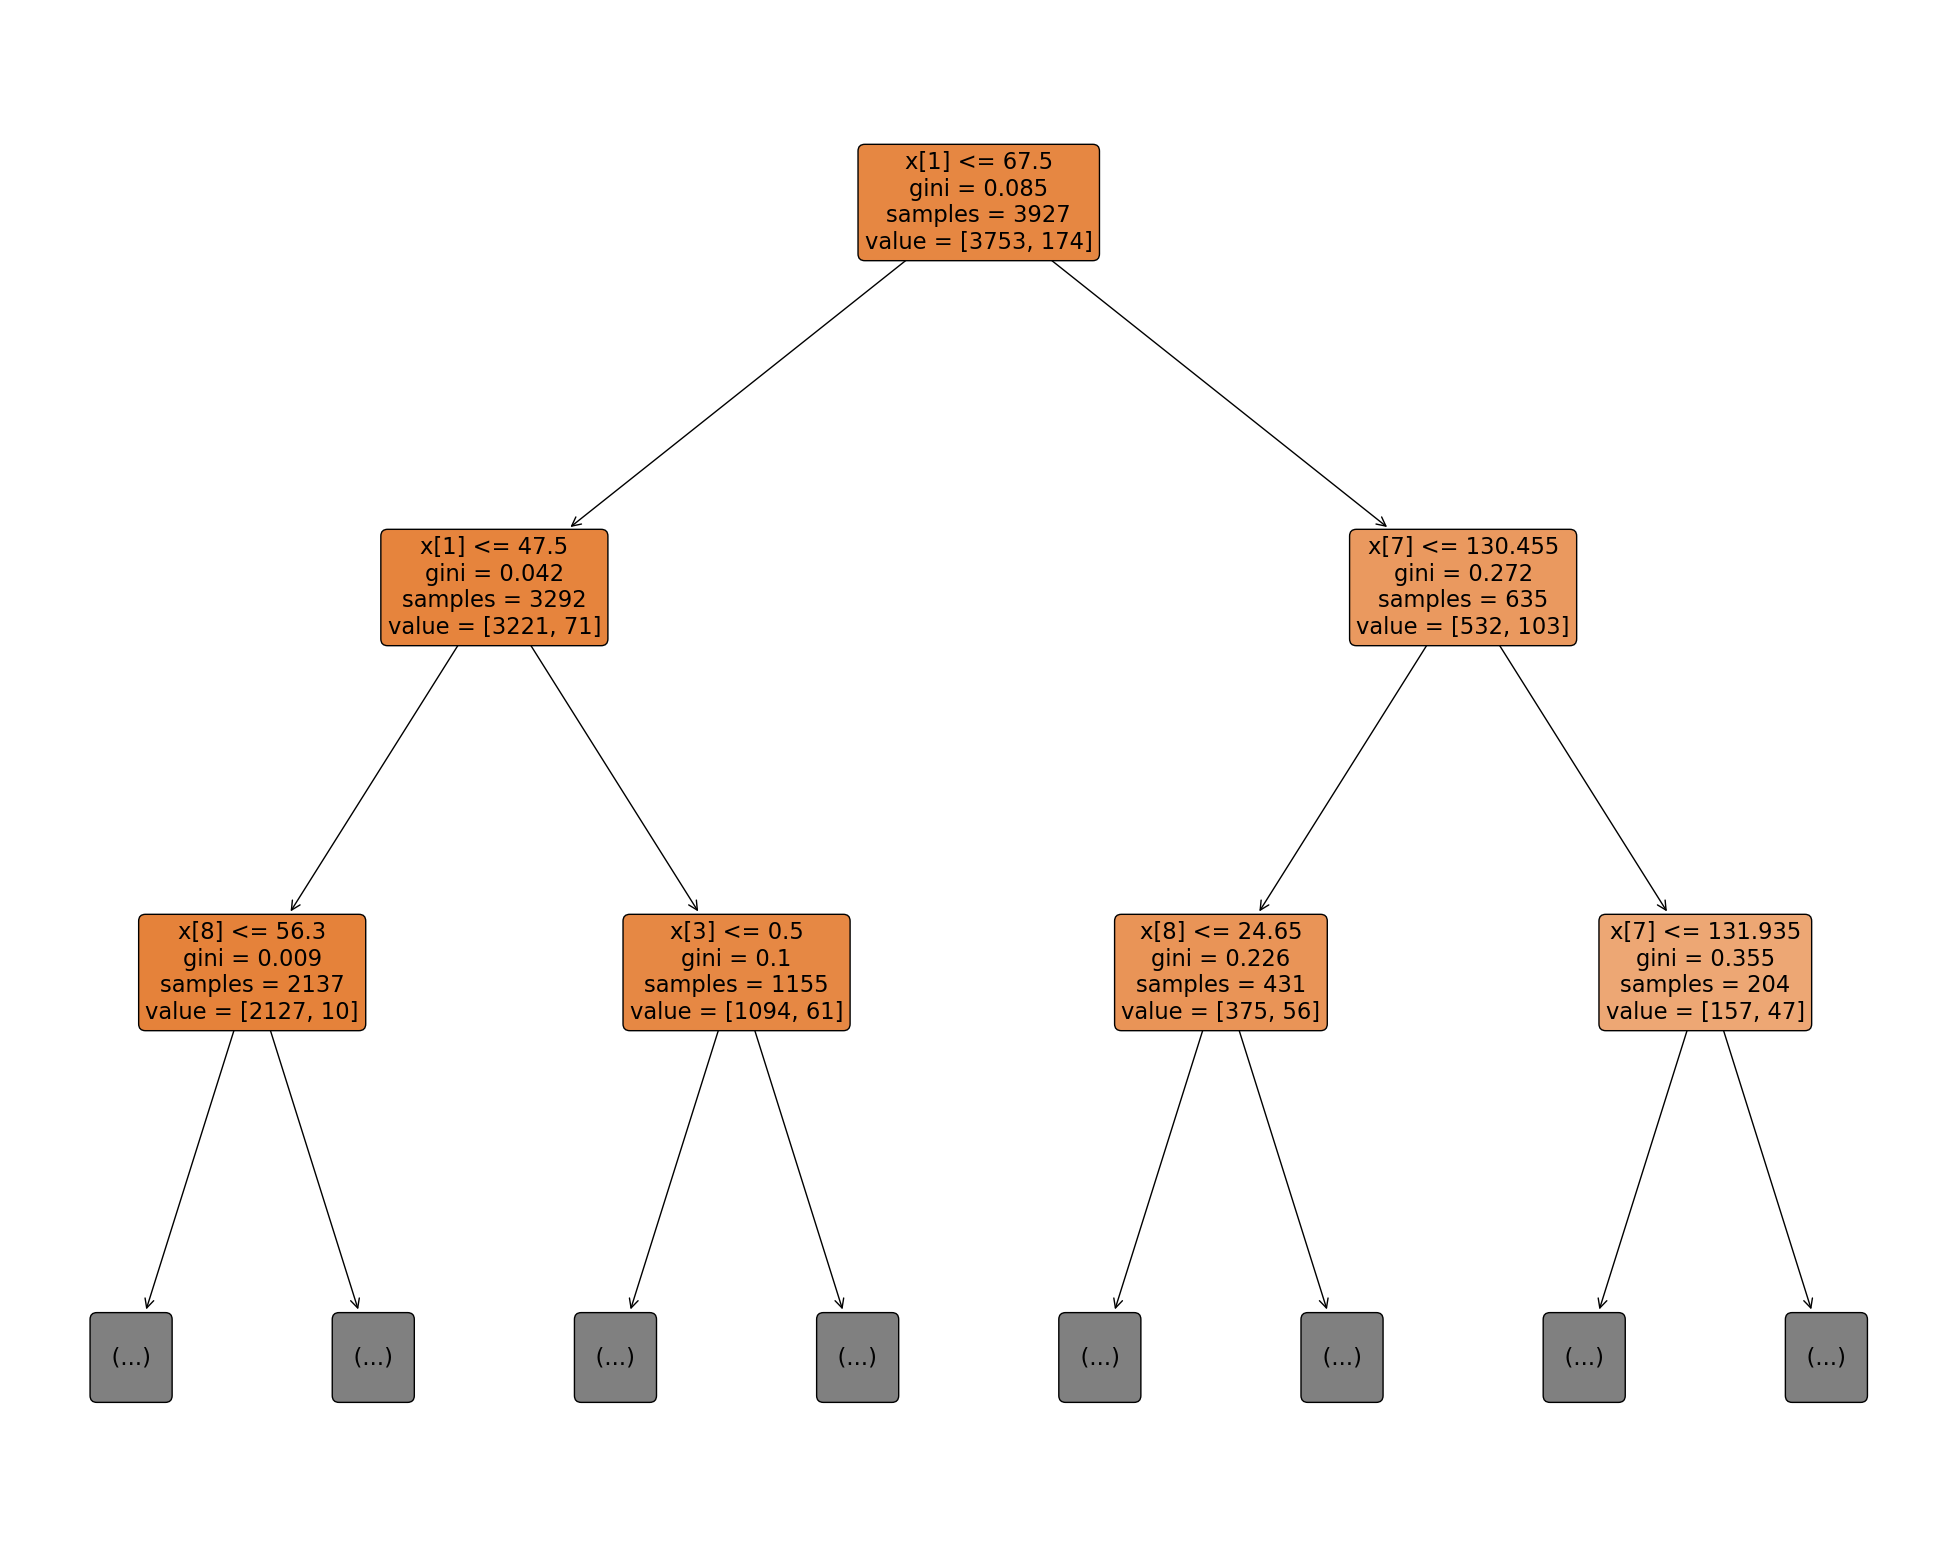

In [757]:
#Use matplotlib to create a decision tree viz
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, filled = True, rounded= True, max_depth= 2)
plt.show()

In [758]:
X.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [759]:
#Export decison tree file.
tree.export_graphviz(model, out_file="stroke-predicter.dot",
    feature_names=["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"],
    class_names=sorted(y.unique().astype(str)),
    label="all",
    rounded=True,
    filled=True)
